# Forschungsprojekt <!-- test -->

## Aufbau

1. [Einführung](#einführung)
    1. [Hintergrund](#hintergrund)
    2. [Fragestellungen und Erwartungen](#fragen)
    3. [Methoden](#methoden)
2. [Laden der Daten](#laden)
3. [Visualisieren der Recordings](#vis_rec)
4. [Visualisieren der Stimuli](#vis_stim)
5. [Erstellung der ROC-Curve](#curve)
5. [Diskussion](#diskussion)

## Einleitung <a name="einleitung"></a>

### Hintergrund <a name="hintergrund"></a> 
Ziel dieses Projektes ist es einen Datensatz aus Spike Train Recordings von Wanderheuschrecken (Locusta migratoria) zu visualisieren und untersuchen. 
Dabei wurden Aktionspotentiale von Nervenzellen der Wanderheuschrecken mittels ihrer Axonen in Hörrezeptoren aufgezeichnet. Die Heuschrecken wurden inmitten zweier Lautsprecher platziert die 60cm Abstand voneinander hatten. Jeder audio-Reiz wurden mit einer Rate von 100kHz von dem jeweiligen Lautsprecher apgespielt, der ipsilateral zu den beobachteten Nerven stand. Die Experimente wurden an Zellen mit verschiedenen Frequenz-präferenzen durchgeführt. Die Präferenz der jeweiligen Zellen wurde mittels der f-I-Kurve der spezifischen Zelle ermittelt. f-I-Kurve steht für "Frequenz-Stromfluss-Kurve", sie zeigt den synaptischen Stromfluss eines Neurons in Bezug auf dessen Feuerrate. Sämtliche anschließenden Experimente wurden mittels eines reinen Tons in der bevorzugten Frequenz der Zelle durchgeführt. 
<!-- Bild f-I-Kurve suchen -->

### Fragestellungen und Erwartungen <a name="fragen"></a> 

Dieses Projekt bezieht sich auf Receiver-Operating-Characteristic-Curves, kurz ROC-Curves. Um ROC-Curves zu verstehen muss zuerst erklärt werden, wie unterschiedliche Ergebnisse in der Statistik differenziert werden können. 

Sei zum Beispiel r eine gemessene Feuerrate während eines Versuches an einer Nervenzelle. Diese Feuerrate wird mit einem Schwellenwert z verglichen. Ist r größergleich z, gibt unser Test das Ergebnis "Plus". "Plus" als Testergebnis heißt, dass der Test behauptet, dass der Stimulus sich in die präferierte Richtung des Neurons bewegt.

Reagiert eine Nervenzelle im visuellen Bereich zum Beispiel bevorzugt auf beobachtete Bewegungen "nach rechts" in der realen Welt, dann möchten wir von dem Test ein "Plus"-Ergebnis erhalten, wenn ein Objekt vor dem Probanden nach rechts bewegt wird und ein "Minus"-Ergebnis, wenn sich das Objekt nach links bewegt. 
<!-- Eventuell cut this^  Als "allgemeinere/verständlichere" Erklärung noch aufgeschrieben -->

 Die Wahrscheinlichkeit ein korrektes "Plus"-Ergebnis zu erhalten wird geschrieben als β(z)=P[r≥z|+], und wird im Allgemeinen als "Hit", "Hit rate", oder "Power" des Tests bezeichnet. Außerdem ist die Definition α(z)=P[r≥z|-] wichtig. α wird auch "Size", oder "False alarm rate" des Tests genannt. In Worten beschrieben gibt α die Wahrscheinlichkeit an, dass der Test fälschlicherweise einen "Plus"-Stimulus wiedergibt, obwohl in Wirklichkeit ein "Minus"-Stimulus, also ein Stimulus der sich entgegengesetzt der präferierten Richtung des Neurons bewegt, vorliegt. Folglich schließt sich, dass die Wahrscheinlichkeit einen "Plus"-Stimulus inkorrekt vom Test identifiziert zu bekommen 1-β ist, und die Wahrscheinlichkeit einen "Minus"-Stimulus korrekt zu identifizieren mittels 1-α gegeben ist.
In all diesen Fällen soll z ein Wert sein, für den die Hit-Rate des Tests maximal groß, und gleichzeitig die False-Alarm-Rate so niedrig wie möglich gehalten werden soll.


Da der Schwellenwert z frei wählbar ist, werden ROC-Curves als Veranschaulichung genutzt. 
Jeder Punkt auf einer ROC-Curve korrespondiert zu einem spezifischen Wert für z. Damit erhalten wir eine visualisierte "Size-to-Power-ratio". 
Die x-Koordinate des Punktes ist die "Size" des Tests α für diesen Wert z. Die y-Koordinate des Punktes korrespondiert zu der "Power" des Tests β für diesen Wert z.
<p align="center">
<img width="400" src="ROC.png">
</p>

Da der Schwellenwert z kontinuierlich variiert wird, erhalten wir mittels all den einzelnen Punkten eine komplette ROC-Curve.

Beispiele für extreme z-Werte: 

Sei z=0, so wird die Feuerrate r immer größergleich z sein. Damit ist α=β=1, wir finden diesen Punkt an der oberen rechten Grenze der ROC-Curve.
Im anderen Extremfall, für sehr große z wird r immer kleiner sein als z. Hier erhalten wir immer "Minus" als Testergebnis. Dieser Punkt ist an der unteren linken Grenze der ROC-Curve sichtbar.
In beiden Fällen kann man richtige Testergebnisse nicht von Falschen unterscheiden.

Zwischen diesen beiden Extremwerten für z bildet sich die ROC-Curve als eine Funktion von z.
Die besten Schwellwerte sind so weit oben links wie möglich, da hier die "Power" β des Tests sehr hoch ist, gepaart mit e.α
<!-- Bild?  verbunden ist.
<!-- Bild? Entweder hier oder schon bei dem oberen Notiz. Falls hier e<-- vtl die Extremfälle z= 0 und z=groß hervorheben?-->

 Es ist auch möglich solche Werte mittels der sogennanten "Two-alternative forced choice", hier als 2-AFC abgekürzt, zu erhalten. Bei 2-AFC wird ein Stimulus zweimal vorgegeben, einmal in "Plus" und das andere mal in "Minus" Richtung. 

Dabei wird den jeweiligen Versuchen eine Feuerrate, r1 und r2 gegeben. 
So können diese beide Feuerraten als "Schwelle" für einander agieren. 
Ist zum Beispiel r1≥r2 gibt der Test den erst gegeben Stimulus als die "Plus"-Richtung an. 
r2 zählt in diesem Fall als Schwellenwert z für r1. 

Als Formel: $$P[r1≥z│+]=β(z) (mit r2=z)\text{ }.$$

Um die tatsächliche Wahrscheinlichkeit einer richtigen Antwort des Tests zu berechnen, schreibt man: $$P[korrekt]=\int_0^∞ dz\text{ }p[z│-]  β(z)\text{ }.$$
<!-- Wie macht man das Integralzeichen richtig mit unterer Grenze 0 und oberer Grnze infinity? -->
Hier entrsricht p[z|-] der bedingten  Feurraten Wahrscheinlichkeitsdichte für r=z. 
Man geht in solchen Fällen davon aus, dass r2 in dem Bereich eines z+Δz liegt, wobei bedeutet, dass wir] heißt in Wörtern, dass wir einen "Minus"-Stimulus vorliegen haben, und der Test z, also r2 als Ergebnis ausgibt. 

Die False-Alarm-Rate dieses Tests ist gegeben mittels $$α(z)= ∫_z^∞ dr\text{ }p[r|-]\text{ },$$ die Power des Tests ist dann $$β(z)= ∫_z^∞ dr\text{ }p[r|+]\text{ }.$$

Sollte r2 zu Anfang > r1 sein, tauschen sie ihre Rollen in diesen Formeln da 2-AFC symmetrisch ist. r1 wäre dann zum Beispiel z. 

<!-- Könnte hier noch mehr auf Details eingehen wie zb mathematische Herleitungen. Könnte außerdem beschreiben wie Dayan&Abott das eine Neuron als "Neuron" (für Plus Stimulus) und als "hypothetical Anti-Neuron" (für Minus Stimulus) beschreiben-->



<!-- TBW: ROC-Curve functionen
ROC-Curve mathematisches wissen keyword: threshold 
vergleich kleiner threshold zu großem threshold an verhalten der ROC-Curve (zu hoch führt zu sehr vielen correct trues (ß), zu niedrig wird zu reinem raten 50ß/50a weil threshold immer "true" sagt)
Grundwissen zu ROC-Curves: Alpha/Beta test, falsch positiv (Vergleiche mit threshold für fehler entstehung)

ROC-Curve keyword: Two-alternative forced choice 
Positiv stimulus (Plus richtung) & negative stimulus (minus richtung) werden beide angegeben. Ziel: Plus richtung erkennen. Trial 1 ist eine richtung, trial 2 zweite richtung, wenn zb. rate1 > rate2 ist die gegebene Antwort trial 1, sonst (rate2>rate1) trial 2 
Hintergrundwissen TAFC: Bayes ([z|+])

Mögliche Bilder für visualisieren: Standard ROC-Curve, ROC-Curve mit verschiedenen thresholds in gleichem bild, ROC-Curves in einer gesamten population an nervenzellen (wenns dazu bild gibt)  -->



### Methoden <a name="methoden"></a> <!-- später, evntl. Unterteilung in Spike-Raster-Plots, Power-Spectral Density und ROC-Curve -->

In [110]:
# importieren aller Module
import matplotlib.pyplot as plt
import json
import numpy as np
import os
import seaborn as sns 
from scipy.stats import probplot, pearsonr
import re

## Laden der Daten <a name="laden"></a> <!-- wichtig: der Pfad für die Daten ist bei uns anders als später im Notebook --> 

In [77]:
path = "./data/grasshopper/Data1/"

### Aufbau der Daten 
Der zu analysierende Datensatz stammt aus den Aufzeichnungen von Ariel Rokem vom Institute for Theoretical Biology an der Humbolt Universität in Berlin. Die Daten des behandelten Sets (“data1”) wurden im Frühling 2003 im Labor von Andreas Herz gesammelt. 

Der Datensatz besteht hauptsächlich aus Verzeichnissen, die die spike times (relativ zum Stimulus) der Teilversuche beinhalten, benannt nach dem Muster “03-01-15-aa". Der vordere Teil des Dateinamens gibt das Datum an, an dem das Experiment durchgeführt wurde, die Buchstaben dahinter die Reihenfolge der Experimente an diesem Tag. 
In solch einem Verzeichnis befinden sich jeweils 5 Dateien. In “...long.dat” sind sowohl für den ersten als auch den zweiten Stimulus (“sig1”, “sig2”) die spike times in Millisekunden relativ zu einer 10 sec. Langen Stimulus Präsentation aufgelistet.
Im Gegensatz dazu befinden sich in den “...spikes.dat” Dateien die spike times des zweiten Teilversuchs. Hierbei wurden die ersten 1000ms des Stimulus mit dem Abstand “pause between Stimuli” wiederholt vorgetragen und das Feuerverhalten der Zelle beobachtet.
Außerdem sind oft zusätzliche Daten als Überschrift über den spike times angegeben. “signal:” mit den möglichen Werten “1” oder “2” gibt an, welcher Stimulus in jenem Teilversuch benutzt wurde. Welchem Stimulus diese Zahl entspricht kann aus der Datei “cell.dat” entnommen werden, oder er wird direkt darunter als “stimulus file” angegeben. “pause between stimuli” bezeichnet in Versuchen mit mehrehren Trials die Länge des Intervalls zwischen den Stimuli Präsentationen. Die “length of ramp” gibt die Zeitspanne an, in der zu Beginn einer jeden Stimulus Präsentation die Lautstärke von 0 auf die gewünschte Lautstärke erhöht wird. Die “desired firing rate” ist die gewünschte Feuerrate des Versuchs, die durch eine bestimmte Stimulus Intensität erreicht wird. Die “repetition number” entspricht der jeweiligen Wiederholung der Stimulus Präsentation (= trial number). “duration (msec)” beschreibt wie lange das Stimulus Stück ist, dass präsentiert wird. 1000 heißt zum Beispiel, dass nur die ersten 1000 ms des Stimulus abgespielt wurden. Die “intensity (dB)” gibt den Wert der Intensität des Stimulus an.
Zuzüglich beinhaltet die “cell.dat” Datei eine Zusammenfassung, die den Zellennamen, sowie die in diesem Teilversuch verwendeten Stimuli beinhaltet. 
Die verwendeten Stimuli werden im Verzeichnis “stimuli” aufgeführt. Aus dem Dateinamen der jeweiligen Stimuli lassen sich Standardabweichung zb. “st12” und cut of frequency zb. “co200” ablesen. Innerhalb einer solchen Datei sind in der linken Spalte die Zeitpunkte in ms und rechts die dazugehörige Amplitude in Volt der jeweiligen Gaußverteilung (siehe Visualisieren der Stimuli) aufgelistet. Außerdem beinhaltet das Verzeichnis “stimuli” eine Funktion mittels welcher der Stimulus in Dezibel umgerechnet werden kann (“stimtodB”). 
Zusätzlich werden in der Datei “firing_rates” die Feuerraten der “..._spikes.dat” Trials angegeben. 
Die Einträge der “singlecells.txt” geben an welche Vergleiche mithilfe von welcher Zelle gemacht wurden. Jede Zeile entspricht hierbei einer Zelle.

### Speichern der .dat Dateien in json

In [78]:
def read_dat_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

def write_json_file(json_data, output_path):
    with open(output_path, 'w') as json_file:
        json.dump(json_data, json_file, indent=2)

In [79]:
# parsing
def parse_stim_to_json(stim_lines):
    t = []
    s = []
    for line in stim_lines:
        line = line.split()
        s.append(float(line[1]))
        t.append(int(line[0]))
    stim = {'t': t, 'stim': s}
    return stim
        

def parse_dat_to_json(dat_lines):
    json_data = {}
    trial_number = 0
    current_trial = []
    
    for line in dat_lines:
        
        if line.startswith("# repetition number"):
            if trial_number > 0: 
                json_data.update({trial_number: current_trial})
            trial_number += 1
            current_trial = []
            
        if line[0].isdigit():
            current_trial.append(int(line))

    return json_data 

In [80]:
def count_total_entries(json_file_path):
    try:
        with open(json_file_path, 'r') as file:
            data = json.load(file)
            total_count = 0
            
            for key in data:
                total_count += len(data[key])

            return total_count

    except FileNotFoundError:
        print(f"File '{json_file_path}' not found.")
        return None

## Visualisieren der Recordings <a name="vis_rec"></a>
Um die Recordings beispielhaft zu visualisieren erstellen wir Spike-Raster-Plots von zwei seperaten Aufnahmen, jeweils mit Signal 1 bzw. Signal 2. Wir verwenden die zuvor definierte Funktion und speichern die Daten in den jeweiligen Variablen:

In [81]:
stim_file_path = path+'stimuli/gaussModality_co200.dat'
stim_lines = read_dat_file(stim_file_path)
json_stim = parse_stim_to_json(stim_lines)

t = np.array(json_stim['t'])
s = np.array(json_stim['stim'])
mask = t<1.e6 # first second

In [82]:
dat_file_path = path+'03-01-15-ab/03-01-15-ab_sig1_spikes.dat'
json_output_path = './03-01-15-ab_sig1_spikes_output.json'
dat_lines = read_dat_file(dat_file_path)
json_data = parse_dat_to_json(dat_lines)
write_json_file(json_data, json_output_path)

with open(json_output_path, 'r') as file:
    spikes1 = json.load(file)

Nun erstellen wir die Plots:

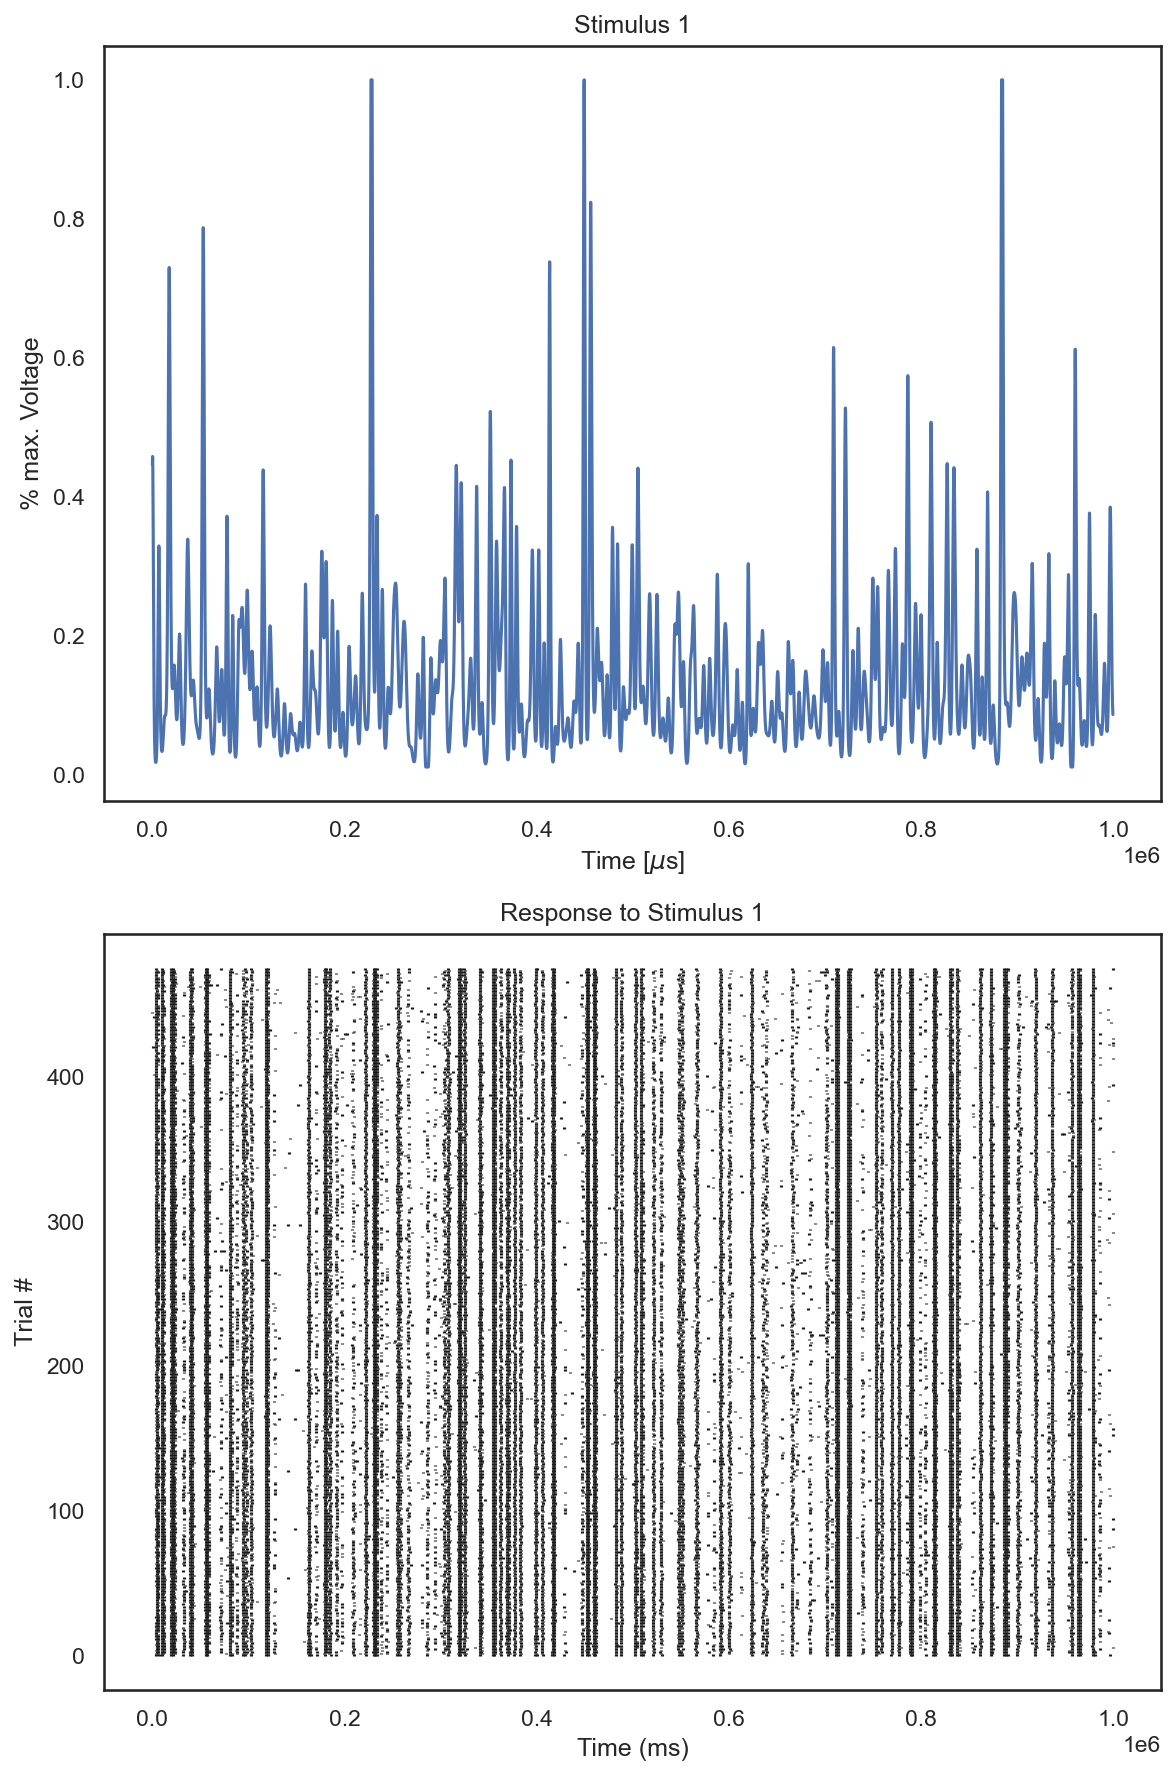

In [83]:
fig, ax = plt.subplots(2, 1, figsize=(8, 12), dpi=150)
for i, st in enumerate(spikes1.values()):
    st = np.array(st)
    st = st[st<1.e6]
    ax[1].vlines(st, i, i+1, color='k')
    
ax[0].plot(t[mask],s[mask])
ax[0].set_xlabel('Time [$\mu$s]')
ax[0].set_ylabel('% max. Voltage')

ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Trial #')
#ax[2].set_xlabel('Time (ms)')

ax[0].set_title('Stimulus 1')
ax[1].set_title('Response to Stimulus 1')
#ax[2].set_title('Response to Stimulus 1')

for i in range(2):
    ax[i].set_xlim(-.5e5, 1.05e6)

plt.tight_layout()

## Visualisieren der Stimuli <a name="vis_stim"></a>
Als Stimuli wurden neun Gaussverteilungen mit variierenden Standardabweichungen (st) und Cutoff-Frequenzen (co) verwendet.
Um diese zu Visualisieren werden zunächst die Daten geladen und in einem Array ("data") abgespeichert.
Zusätzlich werden die Bezeichnungen und die cut off frequencies der einzelnen Stimuli in seperaten Arrays gespeichert ("datatitle" & "cut_off_frequencies").

In [84]:
#Funktion zur Umwandlung von Volt in Dezibel
def volt2dB(v, maxdB=100):
    stim = (20 * 1 / np.log(10)) * (np.log(v / 2.0e-5))
    return maxdB - stim.max() + stim

folder=path+'/stimuli/'

#Laden der einzelnen Stimuli
data=[]
data.append(np.loadtxt(folder+'gauss_st12_co200.dat'))
data.append(np.loadtxt(folder+'gauss_st3_co200.dat'))
data.append(np.loadtxt(folder+'gauss_st6_co100.dat'))
data.append(np.loadtxt(folder+'gauss_st6_co1600.dat'))
data.append(np.loadtxt(folder+'gauss_st6_co200.dat'))
data.append(np.loadtxt(folder+'gauss_st6_co25.dat'))
data.append(np.loadtxt(folder+'gauss_st6_co400.dat'))
data.append(np.loadtxt(folder+'gauss_st6_co50.dat'))
data.append(np.loadtxt(folder+'gauss_st6_co800.dat'))
data.append(np.loadtxt(folder+'gaussModality_co200.dat'))
data.append(np.loadtxt(folder+'lmd_co200.dat'))

datatitle=['gauss_st12_co200','gauss_st3_co200','gauss_st6_co100','gauss_st6_co1600',
           'gauss_st6_co200','gauss_st6_co25','gauss_st6_co400','gauss_st6_co50','gauss_st6_co800', 
           'gaussModality_co200.dat','lmd_co200.dat']
cut_off_frequencies = [200, 200, 100, 1600, 200, 25, 400, 50, 800, 200, 200]

#sampling rate in Hz
sampling_rate = 20000

Als nächstes wird der Plot erstellt. Mithilfe von "rows = len(data)" wird selbst bei einer dynamischen Anzahl an Stimuli für eine geeignete Höhe des Plots gesorgt.<br>
Zu Beginn der for schleife werden durch "t,v = np.array(stim).transpose" zwei Arrays erzeugt, welche die Zeitpunkte ("t") und Stimuliwerte ("v") enthalten. Da die Stimuluswerte allerdings Volt angegeben sind werden sie durch die oben angesprochene Funktion "volt2dB()" in Dezibel umgerechnet.<br>
Als "cof" wird die cut off frequency des aktuellen Stimulus abgespeichert.<br>
Als "ax1" wird in der linken Spalte der Stimulus in Abhängigkeit der Zeit geplotet. Außerdem wird die Bezeichnung des Stimulus als Titel hinzugefügt.<br>
In der rechten Spalte wird der Subplot hinzugefügt, welcher die Power Spectral Density enthält. In diesen wird zusätzlich die cut off frequency als vetrikale, gestrichelte Linie eingefügt.

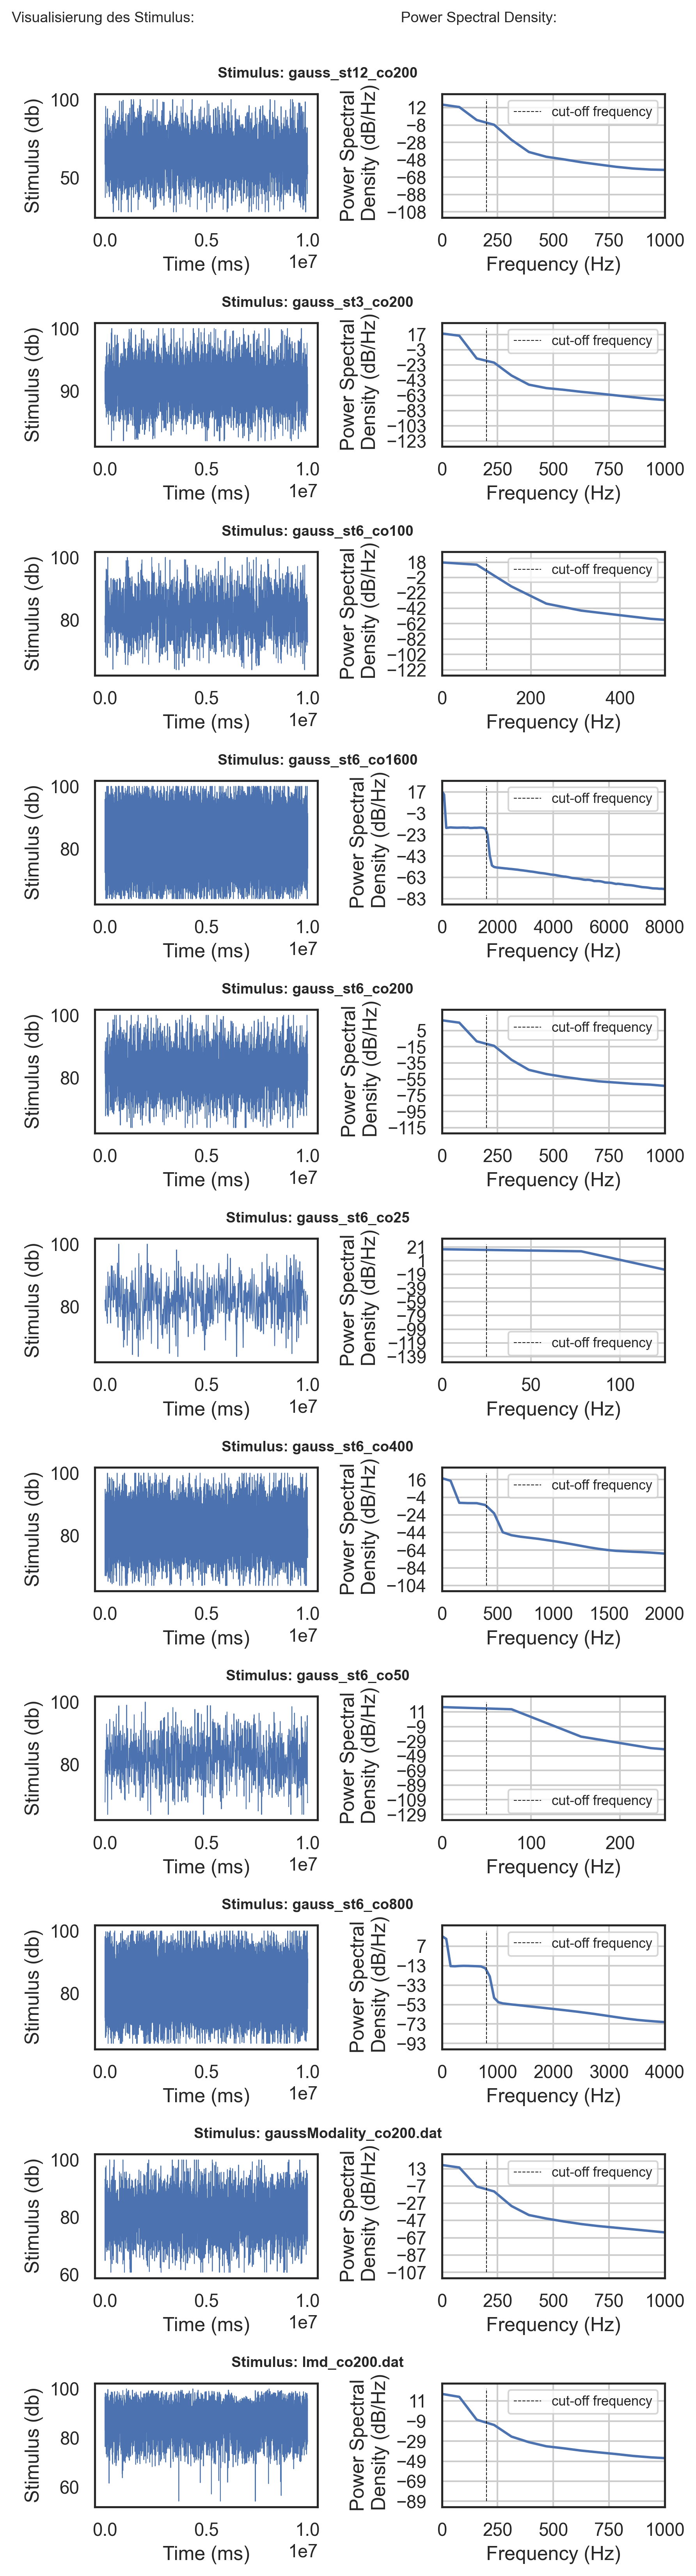

In [85]:
#Erstellung des Plots
rows = len(data)
fig = plt.figure(dpi=300, figsize=(6,2*rows))

for i,stim in enumerate(data):
    t,v = np.array(stim).transpose()
    v = volt2dB(v)
    cof = cut_off_frequencies[i]
    ax1 = fig.add_subplot(rows,2,i*2+1)
    ax2 = fig.add_subplot(rows,2,i*2+2)
 
    # Visualisierung der Stimuli in Abhängigkeit der Zeit
    ax1.plot(t,v, linewidth=0.5)
    ax1.set_title('Stimulus: '+datatitle[i], fontsize=9, fontweight='bold', x=1, pad=10)
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Stimulus (db)')
    
    # Erzeugung der Power spectral density
    ax2.set_xlim(0., 5*cof)
    ax2.psd(v, Fs=sampling_rate)
    ax2.plot([cof, cof],ax2.get_ylim(), 'k--', label='cut-off frequency', linewidth=0.5)
    ax2.set_ylabel('Power Spectral\n Density (dB/Hz)')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.legend(loc='best', fontsize='x-small')
    
    plt.suptitle('Visualisierung des Stimulus:                                                   Power Spectral Density:', x=0.4, y=1, fontsize=9)
    
plt.tight_layout()
plt.show()

# ROC-Curve
Um die Receiver-Operating-Characteristic Curve zu erstellen müssen zunächst die size alpha und die power beta definiert werden, welche wiederum von der Wahrscheinlichkeit für true und false positives abhängig sind. Die Eigenschaft mit der die Stimuli unterschieden werden ist die mittlere Feurerrate. Als "true positive" gilt die Wahrscheinlichkeit das bei Präsentation des ersten, einem Grasshüpfergesang ähnlichen Signal, ein bestimmter Wert niedriger als die mittlere Feuerrate ist, während "false positive" im Umkehrschluss die Wahrscheinlichkeit dafür ist, das ein bestimmter Wert unter der durchschnittlichen Rate liegt obwohl der präsentierte Stimulus der gaußverteilte Stimulus 2 ist.

Jeder Messung unterliegt eine Carrierfrequenz die bei der Aufnahme der Daten hilft. Für die Auswertung muss diese nun wieder abgezogen werden, wofür wir eine Funktion definieren.

In [86]:
def adjust(input, carrier):
    # Subtract the carrier frequency from all input values in every array under every key
    output = {key: [value - carrier for value in values] for key, values in input.items()}
    return output

Um wiederum die jeweilige Carrierfrequenz zu finden definieren wir eine weitere Funktion die diese aus der jeweiligen Annotation ausliest.

In [87]:
def find_carrier(name):
 with open(name, 'r') as file:
            for line in file:
                if "# carrier freq (kHz):" in line:
                    freq_str = line.split(":")[1].strip()
                    carrier_freq = float(freq_str)*1000
                    return carrier_freq

Beispiel:

In [88]:
find_carrier(path+'03-02-25-aj/03-02-25-aj_sig1_spikes.dat')

5000.0

# Beispiel
Für die bessere Veranschaulichung wird während der Definition der einzelnen Funktionen ein Beispiel weitergeführt, um das letztendliche Ziel des Plottens aller Zellen nachvollziehbarer zu machen. Die hierfür betrachtete Zelle ist `03-05-06-aa`.

In [89]:
cell = '03-05-06-aa'

Wir definieren nun eine Funktion um die Feuerrate einer Zelle in Abhängigkeit vom jeweiligen Signaltyp zu berechnen. Hierfür verwenden wir die `spikes` Dateien um so die Performance über mehrere Trials vergleichen zu können.

In [90]:
def calculate_rates(cell, signal):
    rates = []

    dat_file_path = path+cell+'/'+cell+'_sig'+str(signal)+'_spikes.dat'
    sig = adjust(parse_dat_to_json(read_dat_file(dat_file_path)), find_carrier(dat_file_path))

    for key, array in sig.items():
        rate = len(array)
        rates.append(int(rate))

    return rates

Die Raten des Beispiels werden wiefolgt berechnet:

In [91]:
rate_1 = calculate_rates(cell, 1)
rate_2 = calculate_rates(cell, 2)
print("Rate List 1: "+str(rate_1[:10]).replace("]", "")+", ... "+str(rate_1[-10:]).replace("[", ""))
print("Rate List 2: "+str(rate_2[:10]).replace("]", "")+", ... "+str(rate_2[-10:]).replace("[", ""))

Rate List 1: [117, 125, 111, 119, 120, 113, 126, 116, 112, 114, ... 125, 118, 126, 119, 119, 125, 117, 125, 113, 125]
Rate List 2: [133, 130, 129, 130, 125, 130, 124, 129, 125, 116, ... 128, 127, 131, 129, 126, 132, 127, 125, 129, 130]


Zur Integration approximieren wir vorerst das Integral
$\int_{0}^{1} f(x) dx \approx \sum_{n=1}^N f(x_n) \dfrac{1}{N}$
mit dem Riemann-Integral
$\Delta x = x_{n+1} - x_n = \frac{1}{N}$ .

Für die ROC-Kurve gilt somit bei variierender Intervallgröße $\Delta \alpha_n = \alpha_{n+1} - \alpha_{n}$:

$\int_{0}^{1} \beta(\alpha) d\alpha \approx \sum_{n=1}^{N-1} \beta(\alpha_n) (\alpha_{n+1} - \alpha_{n})$ .


In [92]:
def get_AUC(alpha, beta):
    alpha = np.array(alpha)
    beta = np.array(beta)
    intervals = np.abs(alpha[1:] - alpha[:-1])
    beta_interval_averages = (beta[1:] + beta[:-1])/ 2.
    AUC = "{:.3f}".format(np.round(np.sum(intervals * beta_interval_averages), decimals=3))
    return AUC

Um das Beispiel zu vollenden plotten wir nun dafür die ROC-Curve.

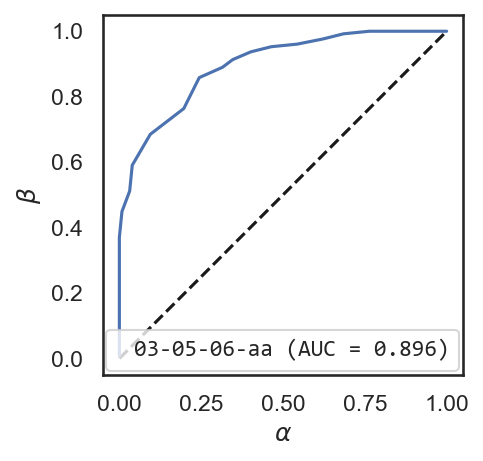

Alpha: [1.0, 0.976, 0.976, 0.976, 0.921, 0.921, 0.921, 0.882, 0.882, 0.882, ... 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Beta: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ... 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.008, 0.008, 0.008, 0.008]


In [93]:
rate_1 = np.array(rate_1)
rate_2 = np.array(rate_2)

min_rate = np.min(np.concatenate((rate_1 , rate_2)))
max_rate = np.max(np.concatenate((rate_1 , rate_2)))

z = np.linspace(min_rate, max_rate, 100)

alpha = [np.sum(rate_1 >= z_i) / np.size(rate_1) for z_i in z]
beta = [np.sum(rate_2 >= z_i) / np.size(rate_2) for z_i in z]

fig = plt.figure(figsize=(3,3),dpi=150)
ax= fig.add_axes([0.15,0.15,0.8,0.8])

ax.plot([0,1],[0,1],'k--')

ax.plot(alpha, beta, label=f'03-05-06-aa (AUC = {get_AUC(alpha, beta)})')

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.legend(loc='lower right', handlelength=0, prop={'family': 'Consolas'}, bbox_to_anchor=(1.02, -0.02))

plt.show() 

print("Alpha: " + str([round(num, 3) for num in alpha][:10]).replace("]", "") + ", ... " + str([round(num, 3) for num in alpha][-10:]).replace("[", ""))
print("Beta: " + str([round(num, 3) for num in beta][:10]).replace("]", "") + ", ... " + str([round(num, 3) for num in beta][-10:]).replace("[", ""))

Wir verallgemeinern nun das obige Beispiel in einer Funktion die anstelle von `alpha` und `beta` drei Listen nimmt, jeweils für alle Alpha, Beta und Zellnamen.

In [94]:
def plot_roc(all_alpha, all_beta, names):

    fig = plt.figure(figsize=(5,5), dpi=150)
    ax = fig.add_axes([0.15, 0.15, 0.8, 0.8])

    num_lines = len(names)
    colors = sns.color_palette("Set1", num_lines)

    for i in range(len(names)):
        label = f'{names[i]} (AUC = {float(get_AUC(all_alpha[i], all_beta[i])):.3f})'
        color = colors[i]
        ax.plot(all_alpha[i], all_beta[i], label=label, color=color)

    ax.plot([0, 1], [0, 1], 'k--')
    
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$\beta$')
    ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), ncol=3, borderaxespad=0., prop={'family': 'Consolas'})
    
    plt.show()

Um die Namen der Zellen zu erhalten und deren TPR (Alpha), FPR (Beta) und AUC zu berechnen wird der Ordner auf alle Einträge, ausgeschlossen die Stimuli, durchsucht. Für jeden Eintrag wird versucht die Operationen die vorher einzeln beispielhaft ausgeführt wurden auf jede Zelle anzuwenden und in einer jeweiligen Liste zu speichern. Damit der Plot übersichtlich bleibt werden Zellen die keine Carrier-Frequency direkt vermerkt haben übersprungen.

In [95]:
items = os.listdir(path)
cells = [item for item in items if os.path.isdir(os.path.join(path, item)) and item != 'stimuli']
all_alpha = []
all_beta = []
names = []
auc_list = []

for i in cells:
    alpha = []
    beta = []
    try:
        rate_1 = np.array(calculate_rates(i, 1))
        rate_2 = np.array(calculate_rates(i, 2))

        if np.mean(rate_1) > np.mean(rate_2): # checks if rate_1 is larger that rate_2, swapping them if that is true to avoid an AUC below 0.5
            tmp1 = np.copy(rate_1)
            tmp2 = np.copy(rate_2)
            rate_1 = tmp2
            rate_2 = tmp1

        min_rate = np.min(np.concatenate((rate_1 , rate_2)))
        max_rate = np.max(np.concatenate((rate_1 , rate_2)))
        z = np.linspace(min_rate, max_rate, 100)

        alpha.extend([np.sum(rate_1 >= z_i) / np.size(rate_1) for z_i in z])
        beta.extend([np.sum(rate_2 >= z_i) / np.size(rate_2) for z_i in z])

        auc_list.append(float(get_AUC(alpha, beta)))

        all_alpha.append(alpha)
        all_beta.append(beta)

        names.append(i)
    except TypeError: 
        continue # ignore entries without an annotated carrier frequency

Nun plotten wir die erhaltenen Einträge.

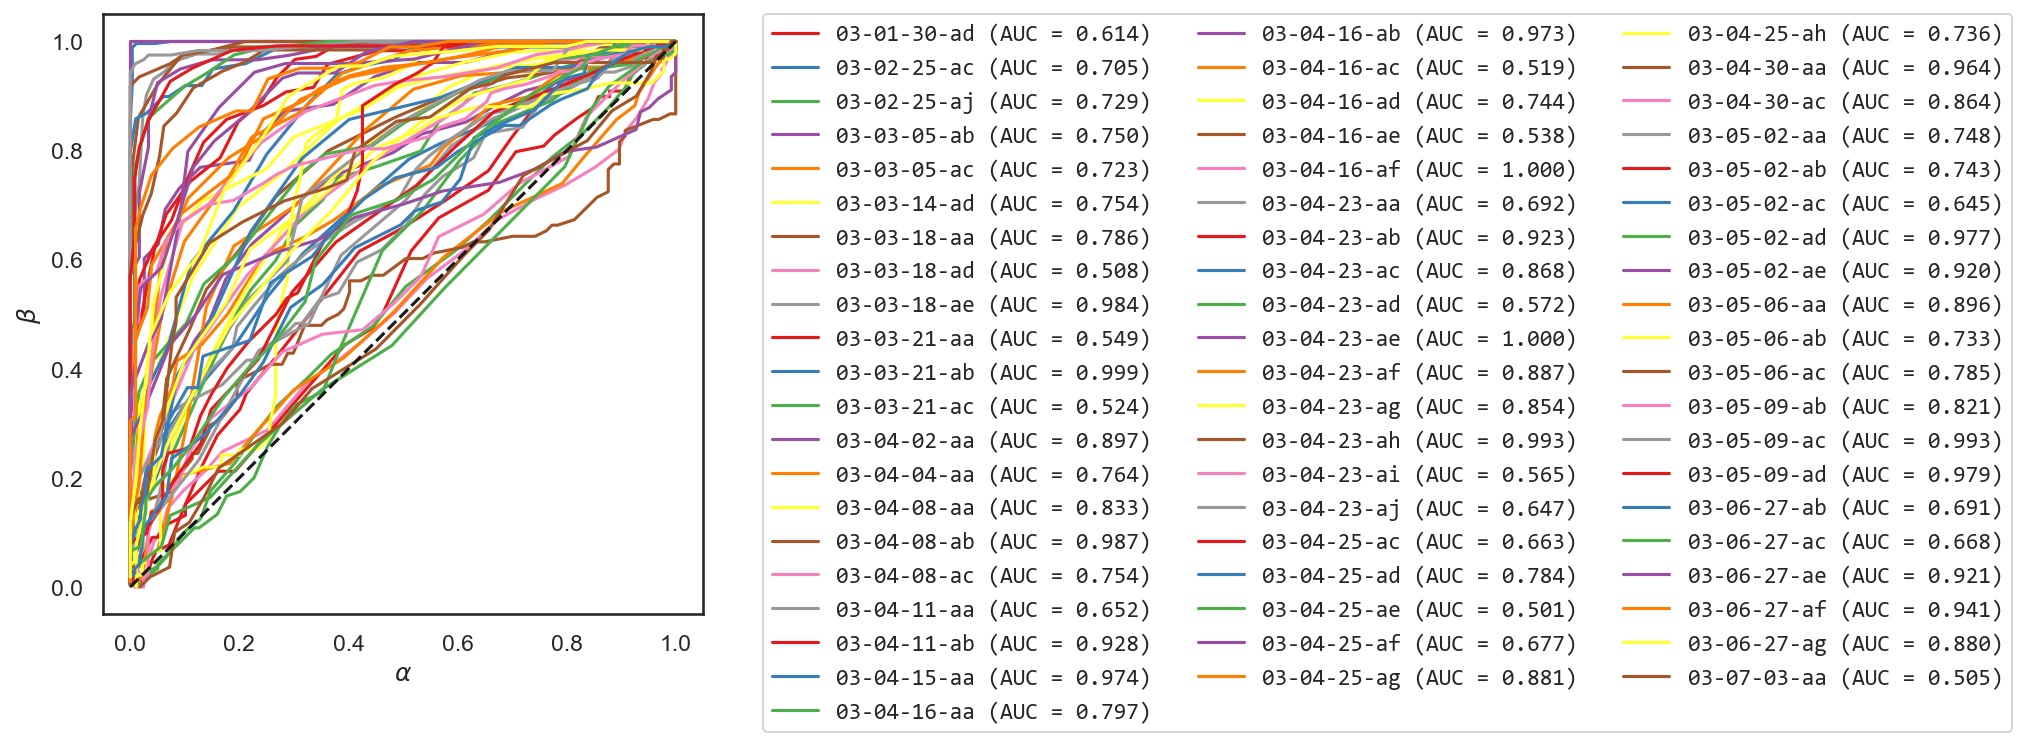

In [96]:
plot_roc(all_alpha, all_beta, names)

Die AUCs lassen sich gut als Histogramm darstellen:

Mean: 0.785
Standard Deviation: 0.152


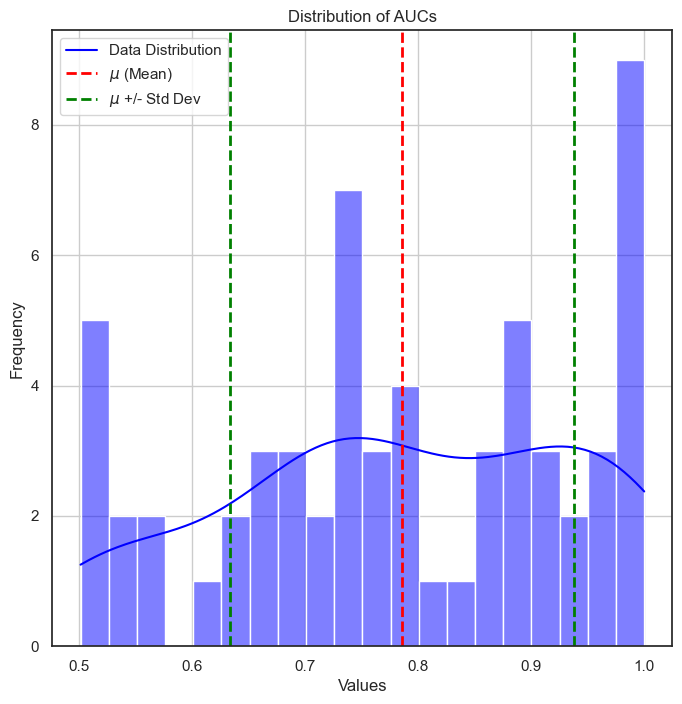

In [97]:
plt.figure(figsize=(8, 8))
sns.histplot(auc_list, bins=20, kde=True, color='blue')
plt.title('Distribution of AUCs')
plt.xlabel('AUC Values')
plt.ylabel('Frequency')

mean_value = np.mean(auc_list)
std_deviation = np.std(auc_list)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_value + std_deviation, color='green', linestyle='dashed', linewidth=2)
plt.axvline(mean_value - std_deviation, color='green', linestyle='dashed', linewidth=2)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(["Data Distribution", r'$\mu$ (Mean)', "$\mu$ +/- Std Dev"])
plt.grid(True)

print("Mean: "+str(np.round(mean_value, 3)))
print("Standard Deviation: "+str(np.round(std_deviation, 3)))

plt.show()

Abschließend kann die Verteilung gut mittels eines Q-Q-Plots visualisiert werden:

Average difference: 0.785


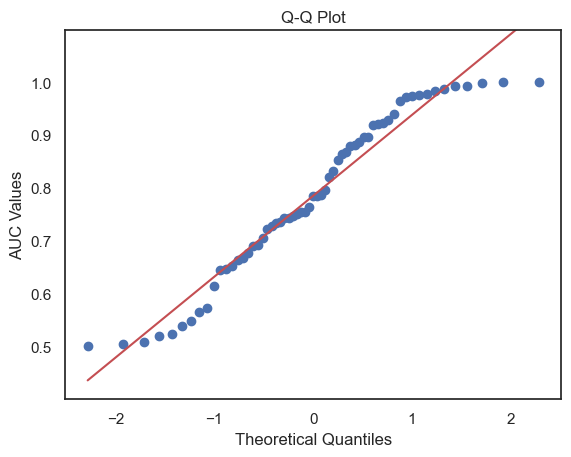

In [98]:
res = probplot(auc_list, plot=plt)
avg_difference = round(sum(res[0][1] - res[0][0]) / len(res[0][1] - res[0][0]), 3)

plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('AUC Values')
plt.ylim(0.4, 1.1)
plt.yticks(plt.yticks()[0][plt.yticks()[0] != 1.1])
plt.yticks(plt.yticks()[0][plt.yticks()[0] != 0.4])

print(f'Average difference: {avg_difference}')
plt.show()

## Interpretation

In der ROC-Curve und dem Histogramm ist sichtbar, dass die Zellen die Signale im Durchschnitt gut unterscheiden können. Der Q-Q-Plot zeigt außerdem das die AUC-Werte zwar Nahe an der Referenzlinie liegen, jedoch leicht einer S-Kurve ähneln. Daraus lässt sich schließen dass die Verteilung nicht uniform ist und es mehr Werte nahe an 0.5 oder 1.0 gibt. Die wenigen extremen Werte von genau 1.0, etwas das implizieren würde das die jeweilige Zelle beide Signale perfekt unterscheiden kann und demnach äußerst unrealistisch ist, könnte darauf zurückzuführen das die Anzahl der Trials zwischen 98 und 533 variiert wurde. Wir definieren eine Funktion um die Trials einer Zelle zu zählen.

In [99]:
def count_trials(cell):
    cell = path+cell+'/'+cell+'_sig1_spikes.dat'
    trials = 0
    with open(cell, 'r') as file:
            for line in file:
                if "# repro call number:" in line: # count arbitrary line that only occurs once per trial
                    trials += 1
    return trials

Beispiel:

In [100]:
count_trials('03-04-16-af')

165

Nun plotten wir einen Korrelationsplot.

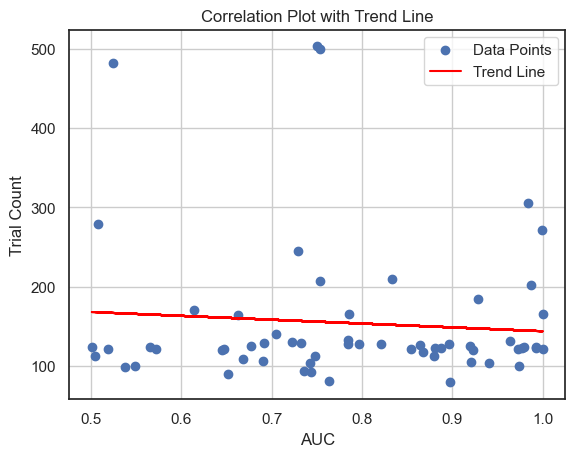

Correlation: -0.08
P-value: 0.5294


In [101]:
trials = [count_trials(name) for name in names]

correlation_coefficient, p_value = pearsonr(auc_list, trials)

slope, intercept = np.polyfit(auc_list, trials, 1)
trend_line = np.polyval([slope, intercept], auc_list)

plt.scatter(auc_list, trials, label='Data Points')
plt.plot(auc_list, trend_line, color='red', label='Trend Line')

plt.title('Correlation Plot with Trend Line')
plt.xlabel('AUC')
plt.ylabel('Trial Count')
plt.grid(True)
plt.legend()
plt.show()

print(f'Correlation: {correlation_coefficient:.2f}\nP-value: {p_value:.4f}')

Mit einer sehr geringen Korrlation und einem p-Wert deutlich größer als 0.05 lässt sich schlussfolgern das es keinen signifikanten Effekt der Trial Länge auf die AUC hat. <br>
Demnach sind die teils extremen Werte vermutlich auf leichte, nicht systematische Schwankungen in Feuerraten zurückzuführen. Da es sich um vereinzelte Fälle ein einer ansonst realistischen Verteilung handelt und die nicht-systematische, also nicht von den Stimuli oder sonstigen Einflüssen abhängige, Varianz in Feuerraten schon in der Studie bewiesen wurde, ist dies unbedenklich.

# Kovarianz

Mittels 'dataset_path_X' (Notiz: immer wenn Variablen durch eine Nummer unterschieden werden, wird die Nummer in diesem Text mit 'X' substituiert) greifen wir über den stativ bennanten path './data/grasshopper/Data1/' auf die Daten der bennanten Zelle 'used_cell_X' (zum Beispiel: '03-01-15-aa') zu. Den erwünschten Spiketrain erhalten wir mittels 'used_spikes_X' (zum Beispiel: '_sig1_long.dat'). 
'filtered_lines_X' entfernt sämtliche nicht relevanten Zeilen aus dem Datensatz indem es kontrolliert, ob eine Zeile mit '#' beginnt. Falls dem so ist, wird diese Zeile für den output ignoriert.
Alle Werte im Datensatz werden daraufhin als 'numerical_value_X' gespeichert und,  mittels 'interval_X' designiert als die Inter-Spike-Intervalle (ISI) der numerical_values_X angegeben.

Unser nächstes Ziel ist es alle Spike-Zeiten in Zeit-Bins darzustellen. t_max ist hier mittels np.min([numerical_value_1[-1], numerical_value_2[-1]]) definiert um sicherzustellen, dass alle folgenden spike_count_time_X gleich lange Arrays haben. Durch numerical_value_X ist t_max nahe der 10 Sekunden-Marke, die dem 10 sekündigen Stimuli von _long.dat Dateien entspricht. spike_count_time_X ist hierbei unsere Blaupause für die bins, die mittels spike_counts_X mit den korrespondierenden Spikes gefüllt wird. 

Jetzt werden die anderen Daten-Arrays der zu vergleichenden Zellen auf die gleiche Länge gebracht, damit wir aus ihnen Graphen/Diagramme erstellen können. Dafür werden die Datensätze mittels des min() commands so bearbeitet, dass der längere Array auf die maximale Länge des kürzeren Arrays getrimmt wird. Um diese Veränderung zu verdeutlichen, werden die Längen der Arrays (als numerical_value_X und als interval_X) vor und nach der min_length-Anpassung ausgegeben. Die Arrays der spike_counts_X und rate_X sind, da die bins gleich dem kleineren numerical_value_X Wert gesetzt sind, automatisch schon auf der gleichen Länge und werden zur Vervollständigung auch ausgegeben.

# Loading Data
## Variables

In [102]:
used_cell_1 = '03-01-15-aa'   
used_spikes_1 = '_sig1_long.dat'
dataset_path_1 = path + used_cell_1 +'/'+used_cell_1+ used_spikes_1
#^Name of first cell to check
filtered_lines_1 = []
with open(dataset_path_1, 'r') as file:
    for line in file:
        if line.strip() and not line.startswith('#'): #check if line starts with # 
            filtered_lines_1.append(line.strip()) #remove lines with # start
#^Acquire all lines that contain useful Data
numerical_value_1= np.array([float(value) for value in filtered_lines_1])
interval_1 = numerical_value_1[1:] - numerical_value_1[:-1]


used_cell_2 = '03-05-06-ab'
used_spikes_2 = '_sig2_long.dat'
dataset_path_2 = path + used_cell_2 + '/'+used_cell_2+ used_spikes_2
#^Name of 2nd cell to check
filtered_lines_2 = []
with open(dataset_path_2, 'r') as file:
    for line in file:
        if line.strip() and not line.startswith('#'): 
            filtered_lines_2.append(line.strip()) 
            
numerical_value_2= np.array([float(value) for value in filtered_lines_2])
interval_2 = numerical_value_2[1:] - numerical_value_2[:-1]

print('Array length of cell 1: ' + str(len(numerical_value_1)))
print('Array length of cell 2: ' + str(len(numerical_value_2)))

print('Array length "interval_1": ' + str(len(interval_1)))
print('Array length "interval_2": ' + str(len(interval_2)))

min_length = min(len(numerical_value_1), len(numerical_value_2))
numerical_value_1 = numerical_value_1[:min_length]
numerical_value_2 = numerical_value_2[:min_length]

min_length_interval = min(len(interval_1), len(interval_2))
interval_1 = interval_1[:min_length_interval]
interval_2 = interval_2[:min_length_interval]

print('')
print('Testing lengths after def align_arrays')
print('Numerical_value_1 length: ' + str(len(numerical_value_1)))
print('Numerical_value_2 length: ' + str(len(numerical_value_2)))
print('Interval_1 length: ' + str(len(numerical_value_1)))
print('Interval_2 length: ' + str(len(numerical_value_2)))

t_max = np.min([numerical_value_1[-1], numerical_value_2[-1]])
dt_rate = 10000 # in ms
spike_count_time = np.arange(0, t_max+1, dt_rate)

spike_counts_1 = np.histogram(numerical_value_1, spike_count_time)[0]
spike_counts_2 = np.histogram(numerical_value_2, spike_count_time)[0]
#spike_counts = number of spikes in each bin

rate_1 = spike_counts_1/dt_rate
rate_2 = spike_counts_2/dt_rate
#rate = number of spikes per time computed in each bin seperately
print('')
print('Length of spike_counts_1: '+ str(len(spike_counts_1)))
print('Length of spike_counts_2: '+ str(len(spike_counts_2)))

Array length of cell 1: 1121
Array length of cell 2: 975
Array length "interval_1": 1120
Array length "interval_2": 974

Testing lengths after def align_arrays
Numerical_value_1 length: 975
Numerical_value_2 length: 975
Interval_1 length: 975
Interval_2 length: 975

Length of spike_counts_1: 868
Length of spike_counts_2: 868


# Covariance and Correlation
## Representation of data using calculations, diagrams & plots

Durch die Funktion np.cov können wir aus den gleich großen Arrays deren Kovarianz ausrechnen. Die Kovarianz kann Werte von minus-Unendlich bis Unendlich annehmen. Eine positive Kovarianz besagt dass, wenn einer der Werte wächst (in unserem Fall ein betrachteter Wert wie SpikeCounts oder Raten der ersten Zelle), der korrespondierende Wert (aus Zelle 2) auch wächst. Negative Kovarianz bedeutet dass, wenn einer der Werte wächst, der andere Wert sinkt (Bsp: Rate Zelle 1 steigt -> Rate Zelle 2 sinkt). Sollte eine Kovarianz von 0 angegeben werden heißt das, dass sich die Werte zufällig voneinander ändern, und folglich keine Kovarianz zwischen Zelle 1 und 2 vorhanden ist. Je größer der numerische Wert der Kovarianz (bzw je kleiner im Falle einer negativen Kovarianz), desto stärker verändert sich der Wert einer Zelle in Tandem zu einer anderen Zelle. Die Kovarianz wird sowohl mittels rein numerischen Werten, als auch bildlich als 'Covariance Matrix' der spike_counts ausgegeben. Die 'Covariance_matrix' zeigt sowohl die Kovarianz der Raten einer Zelle zu sich selbst, als auch die ihrer zu vergleichenden Zelle. 'Covariance_value' ist das rein numerische Ergebnis der Kovarianz zwischen den untersuchten Zellen, die Werte von Zelle 1 und Zelle 2 zu sich selbst werden hier entfernt. Eine wichtige Wiederholung hierzu, da man 'used_spikes_X' frei wählen kann: '_sig1_long.dat' und '_sig2_long.dat' beinhalten alle Spike-Zeiten die durch einen 10 Sekunden langen Stimulus ausgegeben werden. Die '_sig1_spikes.dat' und '_sig2_spikes.dat' Dateien beinhalten nur die ersten 1000ms eines Stimulus, wobei dieser Stimulus, und folglich dessen response, mehrmals wiederholt wird. Aufgrund der sehr unterschiedlichen Länge an Arrays zwischen 'long' und 'spikes' werden viele Werte aus 'spikes' durch den min_length command verworfen, da 'long' durch die fehlenden Wiederholungen ein viel kleineres Array ist. Außerdem können die Wiederholungen innerhalb der 'spikes.dat' Dateien zu unterschiedlichen Zeiten geschehen, was zu einer Verfälchlichung der Rechenwerte für jede Zelle und jeden Re-Trial aller Zellen führen kann. Für unsere Ergebnisse nutzen wir ausschließlich 'long' zu 'long' Dateien, um die Berechnung der Raten übersichtlicher zu gestalten, und den Problemen, die durch Wiederholungen entstehen, innerhalb eines Datensatzes auszuweichen. 

Als Erstes erstellen wir das 'covariance_array' aus den erwünschten spike_counts_X und rate_X um darause die covariance_matrix_X zu berechnen. Als Erinnerung, dass rate_X nur ein um Faktor dt verändertes Array der spike_counts_X ist, werden hier deren Kovarianz Matrizen und Kovarianz Werte ausgegeben. Außerdem wird für die graphische Ausführung der Kovarianz Matrix beispielhaft die Matrix der spike_counts_X ausgegeben.

Ein Scatter-plot zu den jeweiligen numerical_value_X's, sowie zwei Histogramme mit den interval_X's der Zellen werden als weiteres visuelles Element hinzugefügt. Der Scatter-plot zeigt sämtliche einzelnen Daten-Punkte für alle numerical_value_X der betrachteten Zellen. Sollte aus irgendeinem Grund eine der Zellen von '_long.dat' zu '_spikes.dat' verändert werden, erkennt man das (allerspätestens) am Scatter plot. Die Histogramme zeigen die Verteilung der ISI's der jeweiligen Zellen, dabei steht die X-Achse für die Dauer eines Intervalls, und die Y-Axis für die Frequenz der Inter-Spike-Intervalle. Je höher der Balken, desto wahrscheinlicher ist ein ISI der zugehörigen Dauer. Interspike Intervalle sind exponential-verteilt.  
Die jeweiligen spike_counts_1 und spike_counts_2 der betrachteten Zellen sind in einem step-Plot dargestellt.

Da die Werte der Kovarianz-Matrix alleine nicht wirklich übersichtlich darstellen, wie stark sich zwei Werte in tandem verändern, bilden wir eine Korrelations-Matrix. Die Korrelations-Matrix ist eine standardisierte Version der Kovarianz-Matrix die man erhält, indem man die Kovarianz-Matrix der eingegeben Datensätze durch das Produkt ihrer Standardabweichungen teilt. Da die Matrix nun von -1 bis 1 normiert ist, ist es viel anschaulicher wie stark die rate_X's der zu vergleichenden Zellen miteinander positiv, negativ, oder im Falle eines 0-Ergebnisses, überhaupt nicht mit einander korellieren. Die Korrelation einer Rate einer Zelle zu sich selbst ist immer 1. Da die Korrelations-Matrix eine standardisierte Kovarianz-Matrix ist, bleiben die oben gennanten Regeln zu positiven, negativen, und null-Ergebnissen erhalten. 
Hier werden, neben dem Graphen der Korrelation außerdem die genauen numerischen Werte der Korrelationsmatrizen von spike_counts_X und rate_X ausgegeben. Dank der Normierung der Korrelationsmatrix sind diese identisch.

Covariance of spike_counts_1 and spike_counts_2
[[ 0.80629216 -0.00455249]
 [-0.00455249  1.17217988]]
Covariance of rate_1 and rate_2
[[ 8.06292156e-09 -4.55248513e-11]
 [-4.55248513e-11  1.17217988e-08]]
Covariance_value: 
-4.552485130674659e-11


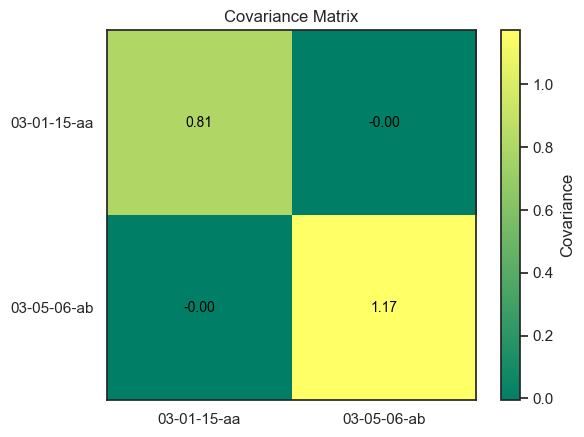

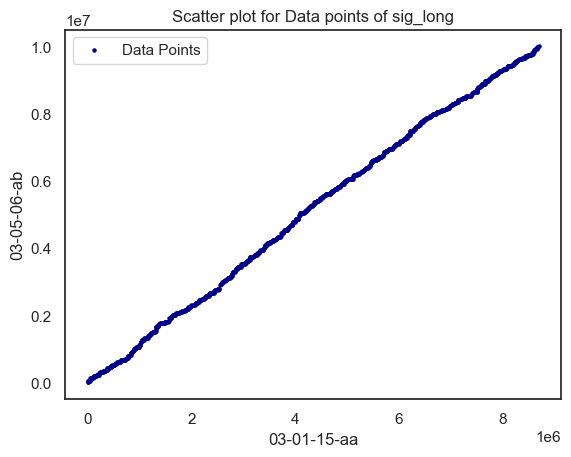

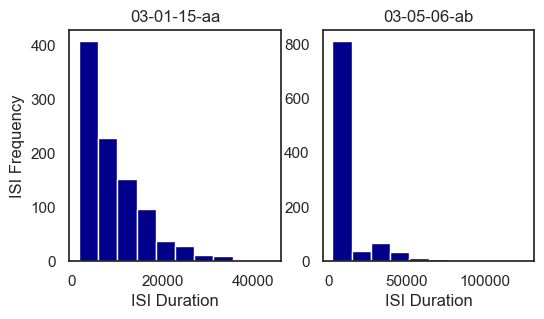

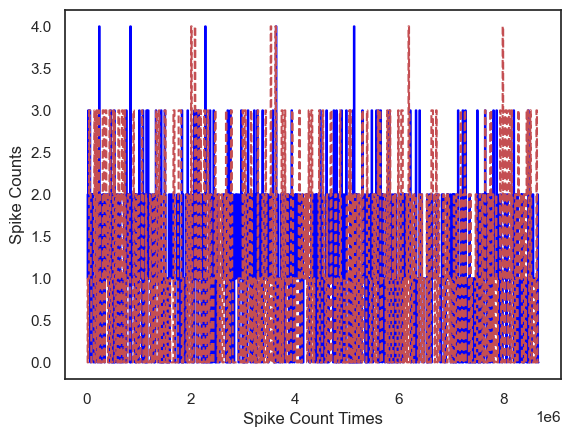

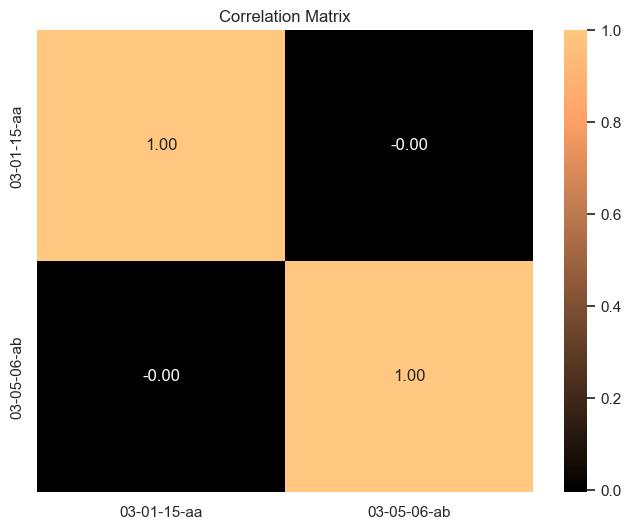

Correlation of rates and spike counts are identical:
Correlation- spike_counts: 
[[ 1.        -0.0046828]
 [-0.0046828  1.       ]]
Correlation- rates: 
[[ 1.        -0.0046828]
 [-0.0046828  1.       ]]


In [103]:
covariance_array = np.array([rate_1, rate_2])
covariance_matrix = np.cov(covariance_array)
covariance_array_spike_counts = np.array([spike_counts_1, spike_counts_2])
covariance_matrix_spike_counts = np.cov(covariance_array_spike_counts)
#^ Calculating covariance_matrix
covariance_value = covariance_matrix[0,1] 
#^ Extract the covariance between the two arrays
print('Covariance of spike_counts_1 and spike_counts_2')
print(np.cov([spike_counts_1, spike_counts_2]))
print('Covariance of rate_1 and rate_2')
print(np.cov([rate_1, rate_2]))
print('Covariance_value: ')
print(covariance_value)
#^ Important math note here:
    #Covariance can range from negative infinity to infinity
        #Negative covariance: If one decreases, the other increases
        #Positive covariance: If one increases so does the other
        #No Covariance: Random, stimuli increase/decrease is not correlated
        #The bigger/smaller the value the stronger/weaker the correlation between stimuli.

        
#Creating the covariance matrix plot for spike counts   
plt.imshow(covariance_matrix_spike_counts, cmap='summer', interpolation='nearest')
for i in range(covariance_matrix.shape[0]):
    for j in range(covariance_matrix.shape[1]):
        plt.text(j, i, f'{covariance_matrix_spike_counts[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)      
plt.title('Covariance Matrix')
plt.colorbar(label='Covariance')
plt.xticks([0,1], [used_cell_1, used_cell_2])
plt.yticks([0,1], [used_cell_1, used_cell_2])
plt.show()

#Creating the scatter plot for all data points in both cells
    #Used mostly as a failsafe to make sure we're using two 'long.dat' of cells
        #If not 2 long.dat -> Clear distinction due to either a clear repetition of trials showing up (1 long + 1 spikes)
            #Or complete dissarray due to double spikes.dat being used
plt.scatter(numerical_value_1, numerical_value_2, s=5, c='darkblue', marker='o', label='Data Points')
plt.title("Scatter plot for Data points of sig_long")
plt.xlabel(used_cell_1)
plt.ylabel(used_cell_2)
plt.legend()
plt.show()

#Show the interspike interval distribution of cells
fig, axs = plt.subplots(1,2, figsize=(6,3))
axs[0].hist(interval_1, color='darkblue') 
axs[0].set_title(used_cell_1)
axs[0].set_xlabel('ISI Duration')
axs[0].set_ylabel('ISI Frequency')
axs[1].hist(interval_2, color='darkblue') 
axs[1].set_title(used_cell_2)
axs[1].set_xlabel('ISI Duration')
plt.show()

#Show every single Spike count per bin for both cells
plt.step(spike_count_time[1:], spike_counts_1, 'blue')
plt.step(spike_count_time[1:], spike_counts_2, 'r--')
plt.xlabel('Spike Count Times')
plt.ylabel('Spike Counts')
plt.show()

correlation_matrix = np.corrcoef(rate_1, rate_2)

#Heatmap using seaborn for correlation matrix
sns.set(style="white")  
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='copper', fmt='.2f',
            xticklabels=[used_cell_1, used_cell_2],
            yticklabels=[used_cell_1, used_cell_2])
plt.title('Correlation Matrix')
plt.show()
print('Correlation of rates and spike counts are identical:')
correlation_spike_counts = np.corrcoef([spike_counts_1, spike_counts_2])
correlation_rates = np.corrcoef([rate_1, rate_2])
print('Correlation- spike_counts: ')
print(correlation_spike_counts)
print('Correlation- rates: ')
print(correlation_rates)


Anhand dieses Codes erhalten wir für alle Zellen im Dataset grasshopper die numerical_values und Raten der jeweiligen Zellen im Bezug ihrer '_sig1_long.dat' Datei. Um manuelle Eingaben für Zellen-namen zu vermeiden nutzen wir eine for-Schleife und die Funktionen 'os.listdir', 'os.path.isdir', sowie 'os.path.join' um die richtigen Daten für jede Zelle auf einmal zu erhalten. 'os.listdir' ermöglicht es uns eine Liste aller Dateien und Verzeichnisse innerhalb 'path' aufzurufen. ('path' wurde anfangs bei Acquisition of Variables & Values definiert.) Für alle Objekte in os.listdir(path) schauen wir nun, ob eine Datei mit 0 beginnt. Diese Kontrolle können wir anwenden, da alle Ordner die Spike-Werte beinhalten mit einer 0 im Namen beginnen. Somit verlaufen sich die Ordner 'stimuli', 'firing_rates' und 'singlecells.txt' nicht in unseren Rechnungen. Innerhalb der for-Schleife werden somit alle Zellen mittels used_cell_i sowie used_spikes_i_1 (='sig1_long.dat') mit dem path verbunden, und erhalten den 'dataset_path_i'. Wir nutzen den gleichen Weg um filtered_lines zu erhalten wie zuvor. Da wir uns in einer Schleife befinden, speichern wir filtered_lines_i zu den korrespondierenden Zellen i ab.

Die rate_i's erhalten wir rechnerisch wie zuvor. Wie bei filtered_lines_i werden auch für alle Raten die jeweiligen rate_i's zu ihren Zellen used_cell_i mittels numerical_value_i berechnet.

Als Ausgabe zeigen wir hier für die erste Zelle ihre korrespondierendes Rate um nicht für jede Zelle ein riesiges Array auszugeben. Wir zeigen jedoch für alle Zellen, dass die korrespondierenden Arrays korrekterweise die gleichen Länge besitzen, was für unseren nächsten Schritt in der nächsten 'Coding-Cell' wichtig ist.

In [108]:
filtered_lines_dict = {}

for dirs in os.listdir(path):
    if dirs.strip() and dirs.startswith('0'):
        if os.path.isdir(os.path.join(path, dirs)):
            used_cell_i = dirs 
            used_spikes_i_1 = '_sig1_long.dat'
            dataset_path_i = os.path.join(path, used_cell_i, used_cell_i + used_spikes_i_1)
            filtered_lines_i = []
            numerical_value_i = []
            with open(dataset_path_i, 'r') as file:
                for line in file:
                    if line.strip() and not line.startswith('#'):
                        filtered_lines_i.append(line.strip())
            filtered_lines_dict[used_cell_i] = filtered_lines_i

            
#Preparation for .append           
all_spike_counts = []
all_rates = []            

for used_cell_i, filtered_lines_i in filtered_lines_dict.items():
    #print(f"Used Cell: {used_cell_i}")
    numerical_value_i = [float(value) for value in filtered_lines_i]

    t_max = np.min([numerical_value_i[-1]])
    numerical_value_i = [value for value in numerical_value_i if value < t_max]
    
    dt_rate = 10000 
    spike_count_time = np.arange(0, t_max + 1, dt_rate)
    
    spike_counts_i = np.histogram(numerical_value_i, spike_count_time)[0]
    rate_i = spike_counts_i / dt_rate

    min_length_i = min(len(rate_i) for rate_i in filtered_lines_dict.values())
  
    if len(rate_i) > min_length_i: 
        rate_i = rate_i[:min_length_i]
        #print('Length of rate array:', len(rate_i))
        #if used_cell_i == '03-01-16-ab':
            #print("Rates:", rate_i)
    all_spike_counts.append(spike_counts_i)
    all_rates.append(rate_i)

Da alle Rate-Arrays gleich lang sind, können wir nun abschließend eine Korrelationsmatrix erschaffen, die alle Korrelationen der used_cell_i's mit jeder anderen used_cell_i berechnet. Die Diagonale der Matrix ist immer die Rechnung der Korrelation einer Zelle i zu sich selbst, weshalb sie auch immer den Wert 1.0 annehmen. Aufgrund der schieren Größe dieser Ausgabe ist es schwer die genauen errechneten Werte auf einen Blick zu sehen, man kann nur Farbunterschiede klar erkennen. Deshalb sind alle einzelnen Felder innerhalb dieser Korrelations-Matrix zusätzlich mit den jeweiligen used_cell_i-Namen betitelt. Die erste Bezeichnung zeigt hier in welcher used_cell_i-Reihe wir uns befinden, die zweite Bezeichnung nach dem '&' Zeichen gibt die Spalte wieder. Als Beispiel: Für Reihe 1, Spalte 2 ist die Beschriftung: '('03-01-16-ab & 03-06-27-ab',)'.

Die Korrelations-Matrix die hier dargestellt wird entspricht allen '_sig1_long.dat' Dateien aller Zellen im Datensatz 'grasshopper'.

In [105]:
""" all_rates_array = np.array(all_rates)

correlation_matrix_all = np.corrcoef(all_rates_array)    

used_cell_i_names = list(filtered_lines_dict.keys())


#Creation of heatmap
sns.set(style='white')  
plt.figure(figsize=(400, 300))
heatmap = sns.heatmap(correlation_matrix_all, annot=True, cmap='copper', fmt='.2f',
            xticklabels=used_cell_i_names,
            yticklabels=used_cell_i_names,
            annot_kws={'size': 50})

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize = 450)
#^ Bar on right side to show numbers with color gradient


for i in range(len(used_cell_i_names)):
    for j in range(len(used_cell_i_names)):
        label_text = f"{used_cell_i_names[i]} & {used_cell_i_names[j]}",
        text = plt.text(j + 0.4, i + 0.1, label_text,
                       ha='center', va='center', fontsize=12, color='blue')
#^Shows which cells are used for each square in the heatmap

plt.title('Correlation Matrix using '+  used_spikes_i_1 +' for all cells ', fontsize = 500, y=1.01)

plt.show() """

' all_rates_array = np.array(all_rates)\n\ncorrelation_matrix_all = np.corrcoef(all_rates_array)    \n\nused_cell_i_names = list(filtered_lines_dict.keys())\n\n\n#Creation of heatmap\nsns.set(style=\'white\')  \nplt.figure(figsize=(400, 300))\nheatmap = sns.heatmap(correlation_matrix_all, annot=True, cmap=\'copper\', fmt=\'.2f\',\n            xticklabels=used_cell_i_names,\n            yticklabels=used_cell_i_names,\n            annot_kws={\'size\': 50})\n\ncbar = heatmap.collections[0].colorbar\ncbar.ax.tick_params(labelsize = 450)\n#^ Bar on right side to show numbers with color gradient\n\n\nfor i in range(len(used_cell_i_names)):\n    for j in range(len(used_cell_i_names)):\n        label_text = f"{used_cell_i_names[i]} & {used_cell_i_names[j]}",\n        text = plt.text(j + 0.4, i + 0.1, label_text,\n                       ha=\'center\', va=\'center\', fontsize=12, color=\'blue\')\n#^Shows which cells are used for each square in the heatmap\n\nplt.title(\'Correlation Matrix using 

Hier wiederholen wir das gleiche System wie oben, nur beziehen sich alle Werte jetzt auf die '_sig2_long.dat' Datei der jeweiligen used_cell_i's.

In [106]:
filtered_lines_dict_sig2 = {}

for dirs in os.listdir(path):
    if dirs.strip() and dirs.startswith('0'):
        if os.path.isdir(os.path.join(path, dirs)):
            used_cell_i_2 = dirs 
            used_spikes_i_2 = '_sig2_long.dat'
            dataset_path_i_2 = os.path.join(path, used_cell_i_2, used_cell_i_2 + used_spikes_i_2)
            
            if os.path.exists(dataset_path_i_2):
                filtered_lines_i_2 = []
                numerical_value_i_2 = []
                with open(dataset_path_i_2, 'r') as file:
                    for line in file:
                        if line.strip() and not line.startswith('#'):
                            filtered_lines_i_2.append(line.strip())
                filtered_lines_dict_sig2[used_cell_i_2] = filtered_lines_i_2 


all_spike_counts_sig2 = []
all_rates_sig2 = []

for used_cell_i_2, filtered_lines_i_2 in filtered_lines_dict_sig2.items():
    #print(f"Used Cell (_sig2_long.dat): {used_cell_i_2}")
    numerical_value_i_2 = [float(value) for value in filtered_lines_i_2]

    t_max_2 = np.min([numerical_value_i_2[-1]])
    numerical_value_i_2 = [value for value in numerical_value_i_2 if value < t_max_2]
    
    dt_rate_2 = 10000  # in ms
    spike_count_time_2 = np.arange(0, t_max_2 + 1, dt_rate_2)
    
    spike_counts_i_2 = np.histogram(numerical_value_i_2, spike_count_time_2)[0]
    rate_i_2 = spike_counts_i_2 / dt_rate_2

    min_length_i_2 = min(len(rate_i_2) for rate_i_2 in filtered_lines_dict_sig2.values())
    
    if len(rate_i_2) > min_length_i_2: 
        rate_i_2 = rate_i_2[:min_length_i_2]
        #print('Length of rate array (_sig2_long.dat):', len(rate_i_2))
        #if used_cell_i_2 == '03-01-16-ab':
            #print("Rates (_sig2_long.dat):", rate_i_2)
    all_spike_counts_sig2.append(spike_counts_i_2)
    all_rates_sig2.append(rate_i_2)

In [107]:
""" all_rates_array_2 = np.array(all_rates_sig2)

correlation_matrix_all_2 = np.corrcoef(all_rates_array_2)    

used_cell_i_names_2 = list(filtered_lines_dict_sig2.keys())


#Creation of heatmap
sns.set(style='white')  
plt.figure(figsize=(400, 300))
heatmap = sns.heatmap(correlation_matrix_all_2, annot=True, cmap='copper', fmt='.2f',
            xticklabels=used_cell_i_names_2,
            yticklabels=used_cell_i_names_2,
            annot_kws={'size': 50})

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize = 450)
#^Bar on right side to show numbers with color gradient


for i in range(len(used_cell_i_names_2)):
    for j in range(len(used_cell_i_names_2)):
        label_text_2 = f"{used_cell_i_names_2[i]} + {used_cell_i_names_2[j]}",
        text = plt.text(j + 0.4, i + 0.1, label_text_2,
                       ha='center', va='center', fontsize=12, color='blue')
#^Shows which cells are used for each square in the heatmap

plt.title('Correlation Matrix using '+  used_spikes_i_2 +' for all cells ', fontsize = 500, y=1.01)

#plt.show() """

' all_rates_array_2 = np.array(all_rates_sig2)\n\ncorrelation_matrix_all_2 = np.corrcoef(all_rates_array_2)    \n\nused_cell_i_names_2 = list(filtered_lines_dict_sig2.keys())\n\n\n#Creation of heatmap\nsns.set(style=\'white\')  \nplt.figure(figsize=(400, 300))\nheatmap = sns.heatmap(correlation_matrix_all_2, annot=True, cmap=\'copper\', fmt=\'.2f\',\n            xticklabels=used_cell_i_names_2,\n            yticklabels=used_cell_i_names_2,\n            annot_kws={\'size\': 50})\n\ncbar = heatmap.collections[0].colorbar\ncbar.ax.tick_params(labelsize = 450)\n#^Bar on right side to show numbers with color gradient\n\n\nfor i in range(len(used_cell_i_names_2)):\n    for j in range(len(used_cell_i_names_2)):\n        label_text_2 = f"{used_cell_i_names_2[i]} + {used_cell_i_names_2[j]}",\n        text = plt.text(j + 0.4, i + 0.1, label_text_2,\n                       ha=\'center\', va=\'center\', fontsize=12, color=\'blue\')\n#^Shows which cells are used for each square in the heatmap\n\npl

# Diskussion